In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from scipy import sparse
import sys
import sklearn

In [12]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [13]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [14]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

In [18]:
def run():
    points = genfromtxt("gradient_decent_data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

In [19]:
run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


In [54]:
x_quad = [n/10 for n in range(0, 100)]
y_quad = [(n-4)**2+5 for n in x_quad]

Text(0.5, 1.0, 'Quadratic Equation')

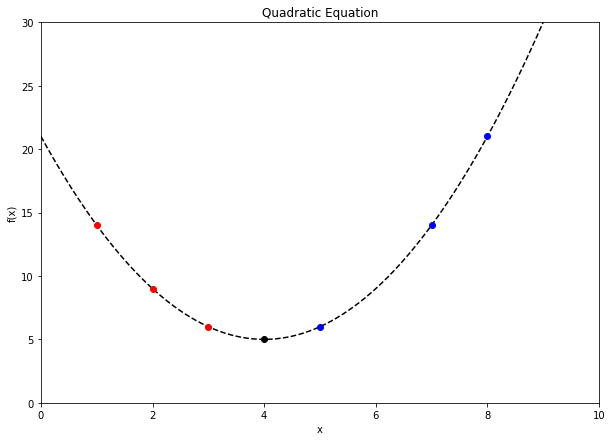

In [55]:
plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,30])
plt.plot([1, 2, 3], [14, 9, 6], 'ro')
plt.plot([5, 7, 8],[6, 14, 21], 'bo')
plt.plot(4, 5, 'ko')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Equation')

In [56]:
data = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])

In [57]:
print(data.head())

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


In [58]:
## Split population and profit into X and y
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

## Length, or number of observations, in our data
m = len(y_df)

Text(0, 0.5, 'Profit in $10,000s')

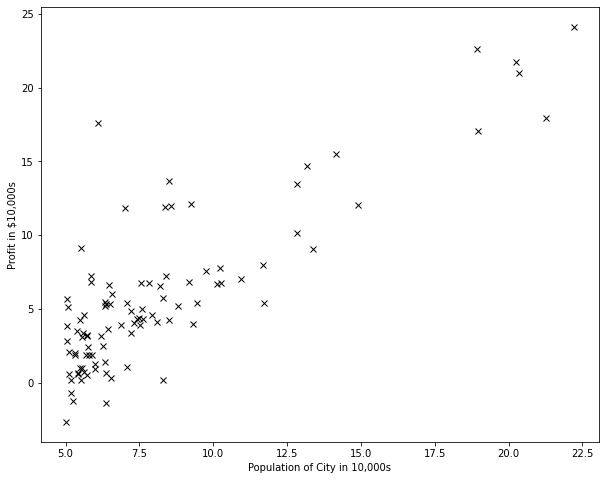

In [59]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'kx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

Text(0, 0.5, 'Profit in $10,000s')

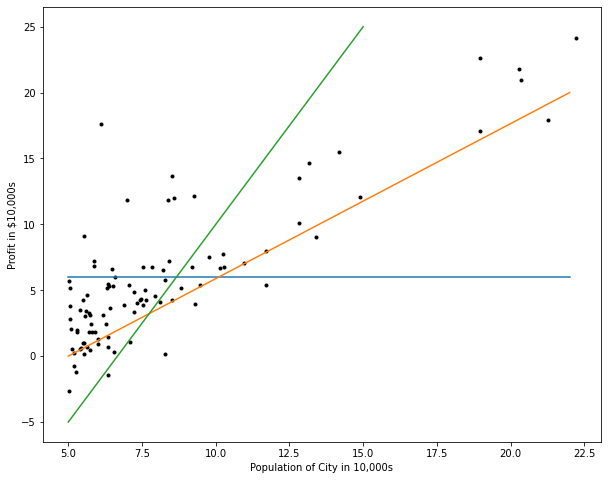

In [60]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'k.')
plt.plot([5, 22], [6,6], '-')
plt.plot([5, 22], [0,20], '-')
plt.plot([5, 15], [-5,25], '-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [61]:
x_quad = [n/10 for n in range(0, 100)]
y_quad = [(n-4)**2+5 for n in x_quad]

Text(0.5, 1.0, 'Quadratic Equation')

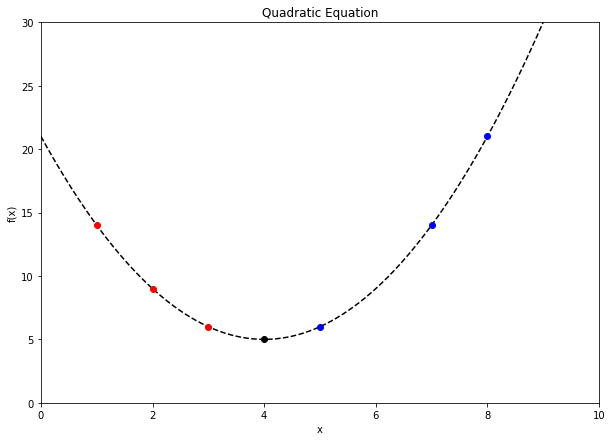

In [62]:
plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,30])
plt.plot([1, 2, 3], [14, 9, 6], 'ro')
plt.plot([5, 7, 8],[6, 14, 21], 'bo')
plt.plot(4, 5, 'ko')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Equation')

In [64]:
theta = np.array([0.1, 0.1])
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y) 
    #print(np.sum(np.multiply(theta,theta)/(1+np.multiply(theta,theta))))
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m + np.sum(np.multiply(theta,theta)/(1+np.multiply(theta,theta)))
    
    return J

In [65]:
cost_function(X, y, theta)

25.469355092053686

In [67]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m + (2 * theta / (np.square( 1 + np.multiply(theta,theta))))
        theta = theta - alpha * gradient 
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

In [81]:
## Add a columns of 1s as intercept to X
X_df['intercept'] = 1
## Transform to Numpy arrays for easier matrix math and start theta at 0
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0])
iterations = 1500
alpha = 0.001
# (t1, c) = gradient_descent(X, y, theta, 0.01, iterations)
# (t2, c) = gradient_descent(X, y, theta, 0.001, iterations)
# (t3, c) = gradient_descent(X, y, theta, 0.0001, iterations)
# (t4, c) = gradient_descent(X, y, theta, 0.00001, iterations)
(t2, c) = gradient_descent(X, y, theta, 1, iterations)

In [82]:
## Print theta parameters
print(t,t1, t2, t3, t4)

[ 0.83366586 -0.38177154] [ 0.83366586 -0.38177156] [ 0.82713008 -0.31777667] [ 0.79683901 -0.02385834] [0.55898334 0.04520055]


In [77]:
y_pred = X@ta

Text(0, 0.5, 'Profit in $10,000s')

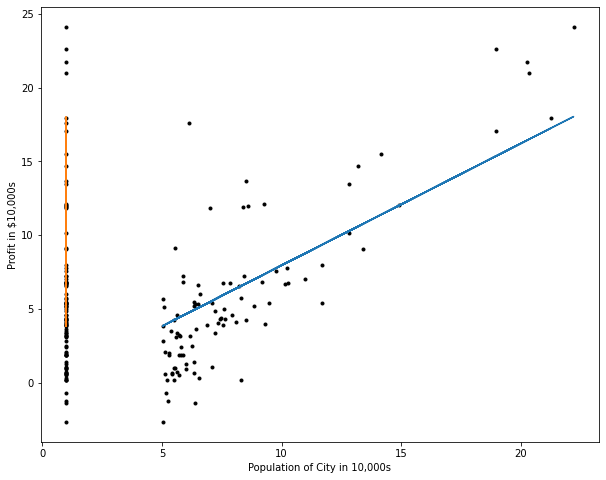

In [78]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'k.')
plt.plot(X, y_pred)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y_df)
print("lr.coef_: {}".format(lr.coef_))

lr.coef_: [[1.19303364 0.        ]]


Text(0, 0.5, 'Profit in $10,000s')

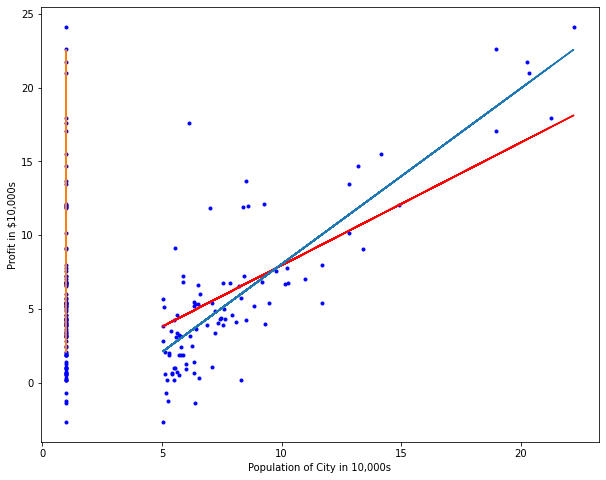

In [88]:
y_pred1 = X@t1
y_pred2 = X@t2
y_pred3 = X@t3
y_pred4 = X@t4
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'k.', color='blue')
plt.plot(X, y_pred1, color='red')
# plt.plot(X, y_pred2, color='green')
# plt.plot(X, y_pred3, color='grey')
# plt.plot(X, y_pred4, color='orange')
plt.plot(X, lr.predict(X))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [40]:
import seaborn as sns
plt.figure(figsize=(10, 10))
# sns.scatterplot(x=lr.coef_[0:],y=lr.coef_[1], hue=pc_comp_target_1['Target'], s=100)
lr.coef_

array([[1.19303364, 0.        ]])

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, 'X')

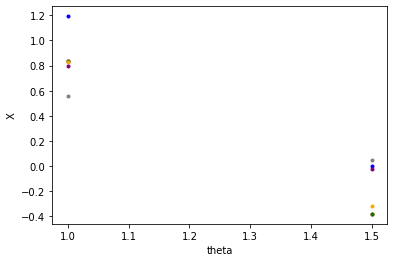

In [85]:
plt.figure()
x = np.array([[1,1.5]])
plt.plot(x,lr.coef_, 'k.', color='blue')
plt.plot(x, [t], 'k.', color='red')
plt.plot(x, [t1], 'k.', color='green')
plt.plot(x, [t2], 'k.', color='orange')
plt.plot(x, [t3], 'k.', color='purple')
plt.plot(x, [t4], 'k.', color='grey')
# plt.plot(X, y_pred)
# plt.plot(X, lr.predict(X))
plt.xlabel('theta')
plt.ylabel('X')